In [17]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
tickers = ['AAPL', 'GOOGL', 'AMZN']
weights = np.array([1/3, 1/3, 1/3])  # Equal weights
initial_investment = 1_000_000  # $1M portfolio

In [33]:
data = yf.download(tickers, start="2022-01-01", end="2025-01-01", group_by='ticker', auto_adjust=True)

[*********************100%***********************]  3 of 3 completed


In [35]:
adj_close = pd.DataFrame()

In [37]:
for ticker in tickers:
    adj_close[ticker] = data[ticker]['Close']  # Use 'Close' if auto_adjust=True


In [39]:
returns = adj_close.pct_change().dropna()

In [47]:
portfolio_returns = returns.dot(weights)

In [55]:
z_95, z_99 = 1.65, 2.33
std_dev = portfolio_returns.std()
VaR_95 = initial_investment * (z_95 * std_dev)
VaR_99 = initial_investment * (z_99 * std_dev)

In [57]:
VaR_95_hist = initial_investment * np.percentile(-portfolio_returns, 5)
VaR_99_hist = initial_investment * np.percentile(-portfolio_returns, 1)

In [59]:
print("=== Value at Risk (1-Day) ===")
print(f"Parametric VaR 95%: ${VaR_95:,.2f}")
print(f"Parametric VaR 99%: ${VaR_99:,.2f}")
print(f"Historical VaR 95%: ${VaR_95_hist:,.2f}")
print(f"Historical VaR 99%: ${VaR_99_hist:,.2f}")

=== Value at Risk (1-Day) ===
Parametric VaR 95%: $29,360.47
Parametric VaR 99%: $41,460.55
Historical VaR 95%: $-27,498.15
Historical VaR 99%: $-43,639.72


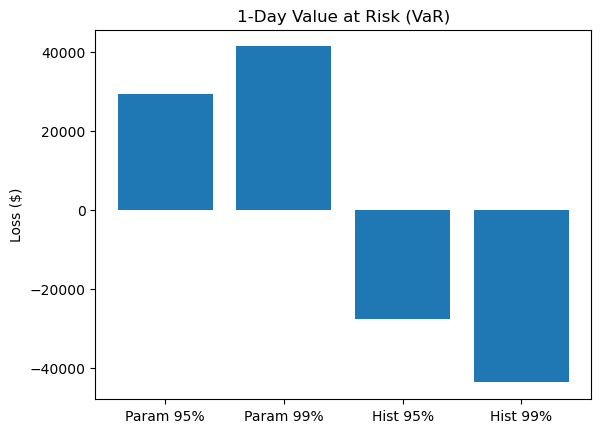

In [87]:
plt.bar(['Param 95%', 'Param 99%', 'Hist 95%', 'Hist 99%'], [VaR_95, VaR_99, VaR_95_hist, VaR_99_hist])
plt.title('1-Day Value at Risk (VaR)')
plt.ylabel('Loss ($)')
plt.show()

In [77]:
mean_returns = returns.mean()
cov_matrix = returns.cov()


In [79]:
n_simulations = 10000
n_assets = len(tickers)

simulated_returns = np.random.multivariate_normal(mean_returns, cov_matrix, n_simulations)

portfolio_sim_returns = simulated_returns.dot(weights)

portfolio_sim_losses = -initial_investment * portfolio_sim_returns


In [81]:
VaR_95_mc = np.percentile(portfolio_sim_losses, 95)
VaR_99_mc = np.percentile(portfolio_sim_losses, 99)

In [83]:
print("=== Monte Carlo Stress Test: 1-Day VaR ===")
print(f"Monte Carlo VaR (95%): ${VaR_95_mc:,.2f}")
print(f"Monte Carlo VaR (99%): ${VaR_99_mc:,.2f}")

=== Monte Carlo Stress Test: 1-Day VaR ===
Monte Carlo VaR (95%): $28,884.31
Monte Carlo VaR (99%): $39,904.69


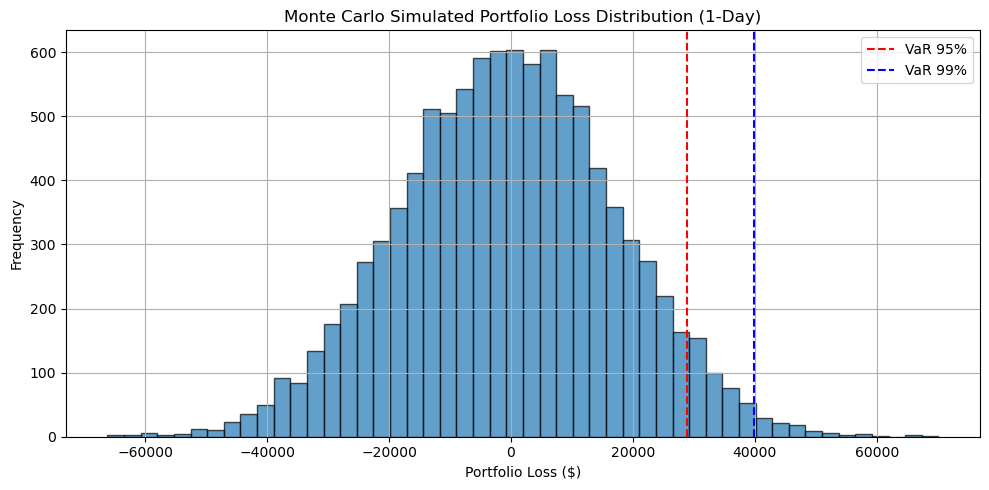

In [85]:
plt.figure(figsize=(10, 5))
plt.hist(portfolio_sim_losses, bins=50, edgecolor='k', alpha=0.7)
plt.axvline(VaR_95_mc, color='r', linestyle='--', label='VaR 95%')
plt.axvline(VaR_99_mc, color='b', linestyle='--', label='VaR 99%')
plt.title("Monte Carlo Simulated Portfolio Loss Distribution (1-Day)")
plt.xlabel("Portfolio Loss ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()